In [13]:
# 모듈 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 로드,전처리(mnist)

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

In [3]:
#shape 확인
print('x_train:{},y_train:{}'.format(x_train.shape,y_train.shape))
print('x_valid:{},y_valid:{}'.format(x_valid.shape,y_valid.shape))

x_train:(60000, 28, 28),y_train:(60000,)
x_valid:(10000, 28, 28),y_valid:(10000,)


In [4]:
#min,max 확인
print('x_train_min:{},x_train_max:{}'.format(x_train.min(),x_train.max()))
print('x_valid_min:{},x_valid_max:{}'.format(x_valid.min(),x_valid.max()))

x_train_min:0,x_train_max:255
x_valid_min:0,x_valid_max:255


In [5]:
#전처리(차원 추가,정규화)
x_train=tf.cast(x_train[...,tf.newaxis],dtype=tf.float32)/255.0
x_valid=tf.cast(x_valid[...,tf.newaxis],dtype=tf.float32)/255.0

In [6]:
#전처리후 shape 확인
print('x_train:{},y_train:{}'.format(x_train.shape,y_train.shape))
print('x_valid:{},y_valid:{}'.format(x_valid.shape,y_valid.shape))

x_train:(60000, 28, 28, 1),y_train:(60000,)
x_valid:(10000, 28, 28, 1),y_valid:(10000,)


In [7]:
#전처리후 min,max 확인
print('x_train_min:{},x_train_max:{}'.format(np.min(x_train),np.max(x_train)))
print('x_valid_min:{},x_valid_max:{}'.format(np.min(x_valid),np.max(x_valid)))

x_train_min:0.0,x_train_max:1.0
x_valid_min:0.0,x_valid_max:1.0


## Functional API로 모델링

In [8]:
input_ = tf.keras.layers.Input(shape = (x_train[0].shape))
x = tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(input_)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='softmax')(x)

In [9]:
model = tf.keras.models.Model(input_,x)

In [10]:
#model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

In [11]:
#model compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [12]:
#model fit
model.fit(x_train,y_train,
         validation_data=(x_valid,y_valid),
         batch_size=128,
         epochs=10)

Epoch 1/10
469/469 [==============================] - 21s 44ms/step - loss: 0.6247 - acc: 0.8088 - val_loss: 0.0686 - val_acc: 0.9785
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0693 - acc: 0.9777 - val_loss: 0.0605 - val_acc: 0.9808
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0453 - acc: 0.9855 - val_loss: 0.0544 - val_acc: 0.9825
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0415 - val_acc: 0.9872
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0297 - val_acc: 0.9891
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0365 - val_acc: 0.9880
Epoch 8/10
469/469 [==============================] - 20s 42ms

## 예측,시각화

In [19]:
#예측
pred = model.predict(x_valid[:10])
np.argmax(pred,axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

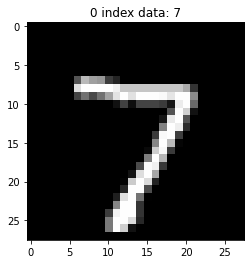

In [42]:
#시각화
idx = 0
plt.title('{} index data: {}'.format(idx,y_valid[idx]))
plt.imshow(np.array(x_valid[idx,:,:,0]),'gray')
plt.show()